# Analysis of Imports and Exports of the Indian Economy

The following datasets show the data of the export and import of several different types of commodities in the Indian economy for the years 2010-2018. Listed on Kaggle (https://www.kaggle.com/lakshyaag/india-trade-data), sourced from the Department of Commerce, Government of India.

The goals of this analysis are:
* Comparing the distrubution of different types of commodities exported to different types of nations (high income, industralised nations such as the US, EU, and Japan.
* Create a net import/export statement for each year recorded.
* Analysing the largest imports to analyse its economic defeciencies of producing locally.
* Analyse the relationship trend between imports and exports of certain products over the given time period

The dataset is split into 4 columns: The commodity description, its corresponding HS code, the trade partner country, the year the trade occured, and its values in million USD.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import dask.dataframe as dd

In [2]:
df_im = pd.read_csv('import.csv')
df_ex = pd.read_csv('export.csv')



In [3]:
pd.set_option('display.max_rows', 10)

df_ex

,HSCode,value,country,year
0,2,0.18,AFGHANISTAN TIS,2018
1,3,0.00,AFGHANISTAN TIS,2018
2,4,12.48,AFGHANISTAN TIS,2018
3,6,0.00,AFGHANISTAN TIS,2018
4,7,1.89,AFGHANISTAN TIS,2018
...,...,...,...,...
137018,95,0.03,ZIMBABWE,2010
137019,96,0.45,ZIMBABWE,2010
137020,97,0.00,ZIMBABWE,2010
137021,98,0.00,ZIMBABWE,2010


The data is classified into types of commodities, each with a unique Harmonized System (HS) code, as specified by the World Customs Organisation (https://www.trade.gov/harmonized-system-hs-codes). The descriptions for each commodity take too much space, so it will be removed.

98 classes of commodities in total, exported to 248 different countries.

## Analysis of export data to developed/developing nations

We will be looking at how the distrubution of commodities exports to high income countries vary. The goal is to see if there is a trend between what is exported to high income nations such as the US, UK, Germany and Japan and what is exported to developing nations such as Nigeria, South Africa, Brazil, Mexico.

The first step is to split the dataframe into groups of HS Codes that represent a particular class of products, as it is easier to analyse a few whole classes than 98 different unique commodity types. For this task, we will only be using 2018 data

The commodity types are:
1. Agricultural goods: HS codes 6-14 that encompasses plant products
2. Tobacco: HS Code 24
3. Chemicals Industry: HS Code 28-38 Pharmaceuticals, organic chemicals, dyes, fertiliser
4. Metals: HS Codes 72-83
5. Oil: HS Code 27
6. Paper products: HS code 47-49


In [4]:
df_ex.dtypes

HSCode       int64
value      float64
country     object
year         int64
dtype: object

In [5]:
df1 = df_ex[(df_ex['country'] == "U S A") & (df_ex['year'] == 2018)]


In [6]:
types = {
    'Agricultural': np.arange(3,15,1),
    'Tobacco': [24],
    'Chemicals': np.arange(28,39,1),
    'Metals': np.arange(72,84,1),
    'Oil': [27],
    'Paper': np.arange(47,50,1)
}

countries = ['USA', 'UK', 'GERMANY', 'FRANCE', 'ITALY', 'NORWAY', 'UAE', 'JAPAN', 'BRAZIL', 'MEXICO', 'MALAYSIA', 'INDONESIA', 'PHILIPPINES']
col = ['Commodity Class', 'Total Value']
d = {name: pd.DataFrame(columns = col) for name in countries}

for name, df in d.items():
    
    df1 = df_ex[(df_ex.country == name) & (df_ex.year == 2018)]
    
    for x,y in types.items():
        
        new_row = {
            'Commodity Class': x,
            'Total Value': df1[df1['HSCode'].isin(y)].value.sum()
        }
        d[name] = d[name].append(new_row, ignore_index=True)

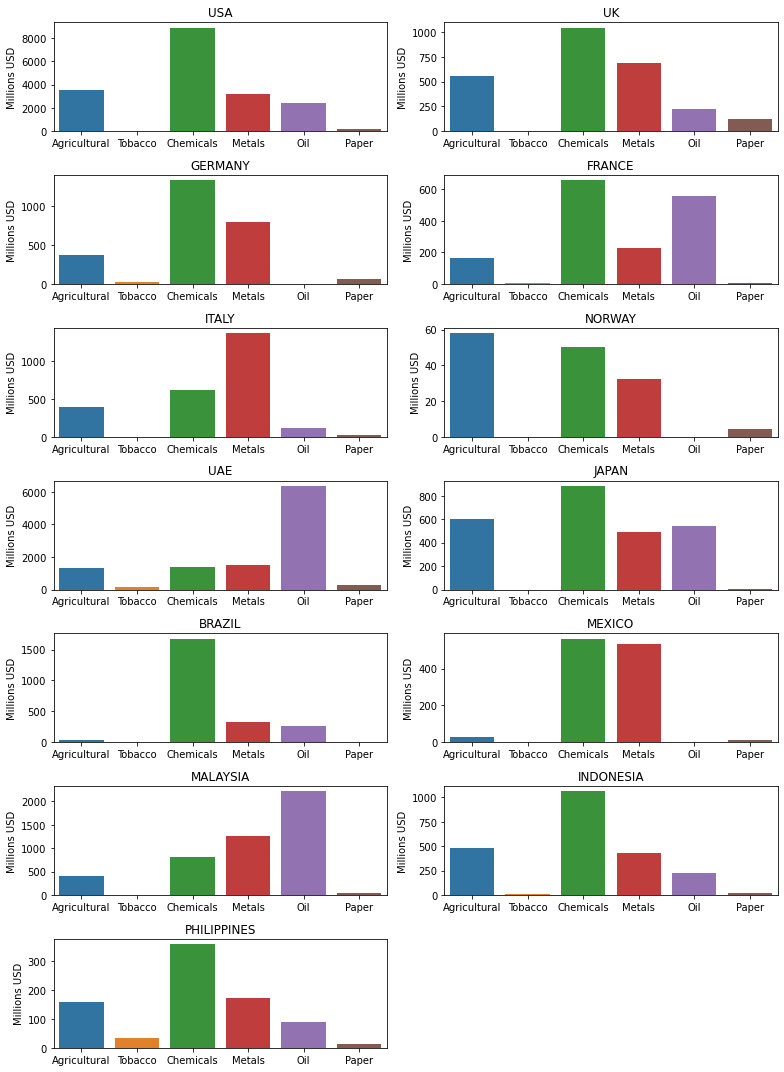

In [7]:
col_nums = 2  # how many plots per row
row_nums = math.ceil(len(d) / col_nums)  # how many rows of plots
plt.figure(figsize=(11, 15))  # change the figure size as needed
for i, (k, v) in enumerate(d.items(), 1):
    plt.subplot(row_nums, col_nums, i)
    p = sns.barplot(data=v, y='Total Value', x='Commodity Class')
    p.set(xlabel=None, ylabel='Millions USD')
    plt.title(f'{k}')

plt.tight_layout()

plt.show()

The distrubution of different types of goods vary as much as each country. There is no discernable pattern between what is most frequently exported to high income countries and what is most frequently exported to low income countries. However, we can see that chemical exports tend to be the highest export class. It might be useful to analyse a scatterplot of Indian chemical exports to a country vs its GDP per capita.

### Creating a scatter plot comparing chemical exports to different income level nations

The first step is to create a dataset of GDP per capita vs chemical exports per capita

In [8]:
gdp = pd.read_csv('gdp.csv')

In [9]:
gdp

,country,gpc
0,AFGHANISTAN,493.750418
1,ANGOLA,3289.646664
2,ALBANIA,5284.380184
3,ANDORRA,41793.055260
4,ARAB WORLD,6601.825189
...,...,...
258,KOSOVO,4419.914327
259,"YEMEN, REP.",824.117629
260,SOUTH AFRICA,6374.028196
261,ZAMBIA,1516.390661


In [10]:
gdp = gdp[gdp['country'].isin(countries)]
gdp

,country,gpc
5,UAE,43839.356350
26,BRAZIL,9001.234249
52,GERMANY,47810.507670
74,FRANCE,41631.090740
78,UK,43043.227820
...,...,...
151,MEXICO,9686.513783
166,MALAYSIA,11377.455000
174,NORWAY,81734.465570
184,PHILIPPINES,3252.092324


In [11]:
c = pd.DataFrame()


In [12]:
for x,y in d.items():
        bruh = y.iloc[2]['Total Value']
        new_row = {
            'country': x,
            'Total Value': bruh
        }
        c = c.append(new_row, ignore_index=True)

In [13]:
c

,Total Value,country
0,8895.72,USA
1,1043.38,UK
2,1336.09,GERMANY
3,656.44,FRANCE
4,611.08,ITALY
...,...,...
8,1677.69,BRAZIL
9,562.35,MEXICO
10,815.25,MALAYSIA
11,1061.51,INDONESIA


In [14]:
pd.set_option('display.max_rows', 10)
c

,Total Value,country
0,8895.72,USA
1,1043.38,UK
2,1336.09,GERMANY
3,656.44,FRANCE
4,611.08,ITALY
...,...,...
8,1677.69,BRAZIL
9,562.35,MEXICO
10,815.25,MALAYSIA
11,1061.51,INDONESIA


In [15]:
population = [328000000, 66700000, 83000000, 67000000, 60400000, 5330000, 9771000, 126000000, 211000000, 128000000, 31950000, 270600000, 10810000]
c['population'] = population
c['TVC'] = c['Total Value']*(1000000) / c['population']
c

,Total Value,country,population,TVC
0,8895.72,USA,328000000,27.121098
1,1043.38,UK,66700000,15.642879
2,1336.09,GERMANY,83000000,16.097470
3,656.44,FRANCE,67000000,9.797612
4,611.08,ITALY,60400000,10.117219
...,...,...,...,...
8,1677.69,BRAZIL,211000000,7.951137
9,562.35,MEXICO,128000000,4.393359
10,815.25,MALAYSIA,31950000,25.516432
11,1061.51,INDONESIA,270600000,3.922801


In [16]:
scat =  pd.merge(gdp,c,on='country')

In [17]:
scat

,country,gpc,Total Value,population,TVC
0,UAE,43839.356350,1373.70,9771000,140.589500
1,BRAZIL,9001.234249,1677.69,211000000,7.951137
2,GERMANY,47810.507670,1336.09,83000000,16.097470
3,FRANCE,41631.090740,656.44,67000000,9.797612
4,UK,43043.227820,1043.38,66700000,15.642879
...,...,...,...,...,...
8,MEXICO,9686.513783,562.35,128000000,4.393359
9,MALAYSIA,11377.455000,815.25,31950000,25.516432
10,NORWAY,81734.465570,50.38,5330000,9.452158
11,PHILIPPINES,3252.092324,359.66,10810000,33.271045


<AxesSubplot:xlabel='gpc', ylabel='TVC'>

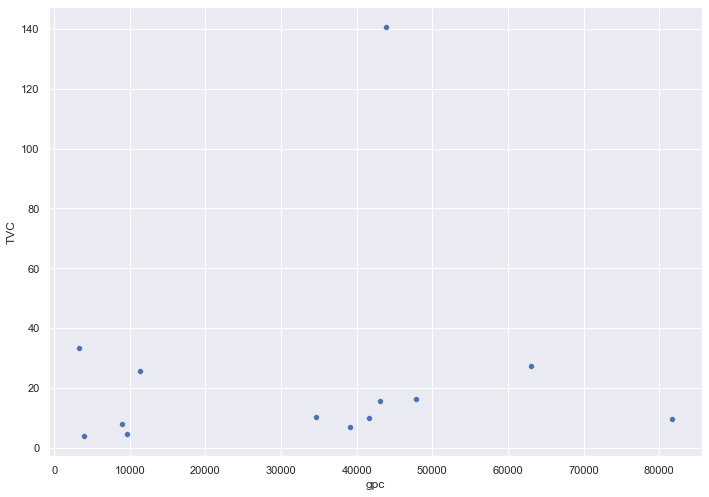

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x = scat.gpc, y = scat['TVC'], palette='bright')

As evident from the above plot, there is correlation between GDP Per Capita and Chemical exports per capita to that country.

## Creating a net Import/Export statement

The goal is to create a net import/export statement each year

In [19]:
df_ex

,HSCode,value,country,year
0,2,0.18,AFGHANISTAN TIS,2018
1,3,0.00,AFGHANISTAN TIS,2018
2,4,12.48,AFGHANISTAN TIS,2018
3,6,0.00,AFGHANISTAN TIS,2018
4,7,1.89,AFGHANISTAN TIS,2018
...,...,...,...,...
137018,95,0.03,ZIMBABWE,2010
137019,96,0.45,ZIMBABWE,2010
137020,97,0.00,ZIMBABWE,2010
137021,98,0.00,ZIMBABWE,2010


In [20]:
years = np.arange(2010,2019,1)

exports_col = ['Yearly export value', 'year']
exports = pd.DataFrame(columns = exports_col)
for x in years:
    df_ex_2018 = df_ex[ df_ex.year == x]
    sum = df_ex_2018.value.sum()
    new_row = {
        'Yearly export value': sum,
        'year': x
    }
    
    exports = exports.append(new_row, ignore_index=True)

imports_col = ['Yearly import value', 'year']
imports = pd.DataFrame(columns = imports_col)
for x in years:
    df_im_2018 = df_im[df_im.year == x]
    sum = df_im_2018.value.sum()
    new_row = {
        'Yearly import value': sum,
        'year': x
    }
    
    imports = imports.append(new_row, ignore_index=True)

    
imports

,Yearly import value,year
0,369762.25,2010.0
1,489311.81,2011.0
2,490730.07,2012.0
3,450192.99,2013.0
4,448026.63,2014.0
5,412537.53,2015.0
6,384350.29,2016.0
7,465574.02,2017.0
8,514071.33,2018.0


In [21]:
im_ex = pd.merge(imports, exports, on='year')
im_ex

,Yearly import value,year,Yearly export value
0,369762.25,2010.0,249801.18
1,489311.81,2011.0,305948.28
2,490730.07,2012.0,300384.32
3,450192.99,2013.0,314388.61
4,448026.63,2014.0,310321.02
5,412537.53,2015.0,262274.30
6,384350.29,2016.0,275835.27
7,465574.02,2017.0,303507.85
8,514071.33,2018.0,330058.64


Text(0, 0.5, 'Value (Millions USD)')

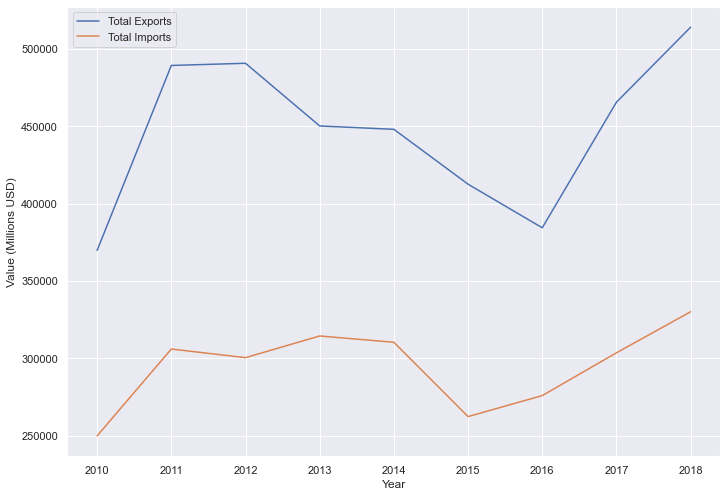

In [22]:
plt.plot( im_ex['year'], im_ex.drop('year', axis=1),)
leg = ['Total Exports', 'Total Imports']
plt.legend(leg)
plt.xlabel('Year')
plt.ylabel('Value (Millions USD)')

## Analysing imports against exports
The goal here is to find the total import values for each HS Code in each year and see how imports for certain commodity classes have changed throughout the years

In [23]:
hscode = np.arange(1,99,1) 
dic = {hscode: np.arange(2010,2019,1) for hscode in hscode}

In [24]:
imports_col = ['HSCode', 'Import value','Export value', 'year']
compare = pd.DataFrame(columns = imports_col)
for code,year in dic.items():
    for year2 in year:
        imp = df_im[(df_im.year == year2) & (df_im.HSCode == code)]
        exp = df_ex[(df_ex.year == year2) & (df_ex.HSCode == code)]
        imptotal = imp.value.sum()
        exptotal = exp.value.sum()
        new_row = {
            'HSCode': code,
            'year': year2,
            'Import value': imptotal,
            'Export value': exptotal
        }
        compare = compare.append(new_row, ignore_index=True)


In [25]:
compare

,HSCode,Import value,Export value,year
0,1.0,9.19,12.24,2010.0
1,1.0,10.57,12.88,2011.0
2,1.0,10.26,10.56,2012.0
3,1.0,10.09,11.35,2013.0
4,1.0,11.92,12.71,2014.0
...,...,...,...,...
877,98.0,3640.59,66.04,2014.0
878,98.0,2862.65,75.25,2015.0
879,98.0,2085.01,64.89,2016.0
880,98.0,2095.39,44.58,2017.0


Here we have generated the total import value for a particular HSCode each year. Now we aim to deseminate this data by analysing certain HS codes/commodity classes

In [26]:
pd.set_option('display.max_rows', None)

In [28]:
compare

,HSCode,Import value,Export value,year
0,1.0,9.19,12.24,2010.0
1,1.0,10.57,12.88,2011.0
2,1.0,10.26,10.56,2012.0
3,1.0,10.09,11.35,2013.0
4,1.0,11.92,12.71,2014.0
5,1.0,9.78,70.73,2015.0
6,1.0,9.24,78.73,2016.0
7,1.0,8.78,63.85,2017.0
8,1.0,8.94,42.94,2018.0
9,2.0,1.10,1960.70,2010.0


From viewing the dataframe, we can see HSCodes 27, 29, 39, 71, 84, 85 are the largest commodities traded in the country

* 27 - Oils
* 29 - Organic Chemicals
* 39 - Plastics
* 71 - Jewellry
* 84 - Large industrial devices: reactors, boilers, machinery
* 85 - Electrical machinery and componenets

### Oils

Text(0, 0.5, 'Value (Millions USD)')

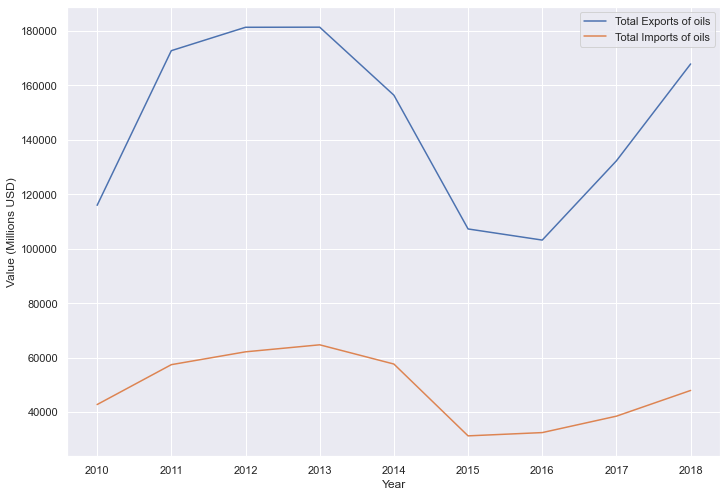

In [44]:
compare_oils = compare[compare['HSCode'] == 27]
compare_oils
plt.plot( compare_oils['year'], compare_oils.drop(['year', 'HSCode'], axis=1),)
leg = ['Total Exports of oils', 'Total Imports of oils']
plt.legend(leg)
plt.xlabel('Year')
plt.ylabel('Value (Millions USD)')

### Organic Chemicals

Text(0, 0.5, 'Value (Millions USD)')

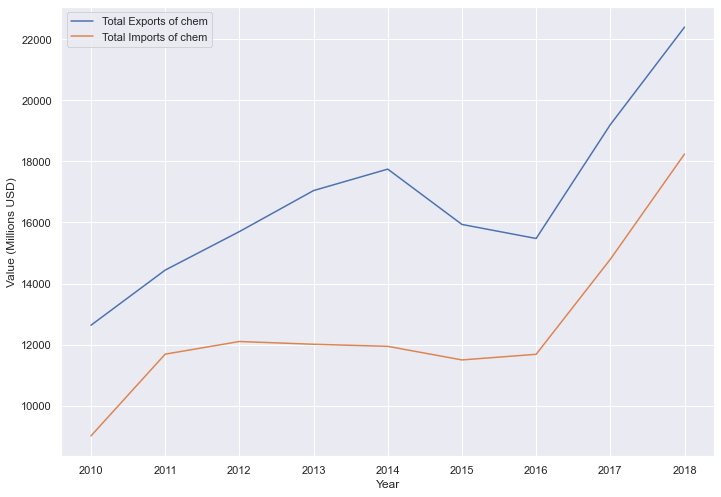

In [45]:
compare_chem = compare[compare['HSCode'] == 29]
compare_chem
plt.plot( compare_chem['year'], compare_chem.drop(['year', 'HSCode'], axis=1),)
leg = ['Total Exports of organic chemicals', 'Total Imports of organic chemicals']
plt.legend(leg)
plt.xlabel('Year')
plt.ylabel('Value (Millions USD)')

### Plastics

Text(0, 0.5, 'Value (Millions USD)')

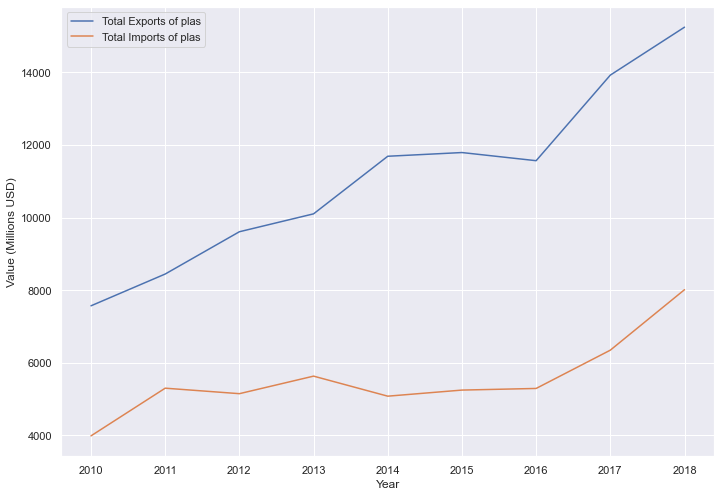

In [47]:
compare_plas = compare[compare['HSCode'] == 39]
compare_plas
plt.plot( compare_plas['year'], compare_plas.drop(['year', 'HSCode'], axis=1),)
leg = ['Total Exports of plastics', 'Total Imports of plastics']
plt.legend(leg)
plt.xlabel('Year')
plt.ylabel('Value (Millions USD)')

### Jewellry

Text(0, 0.5, 'Value (Millions USD)')

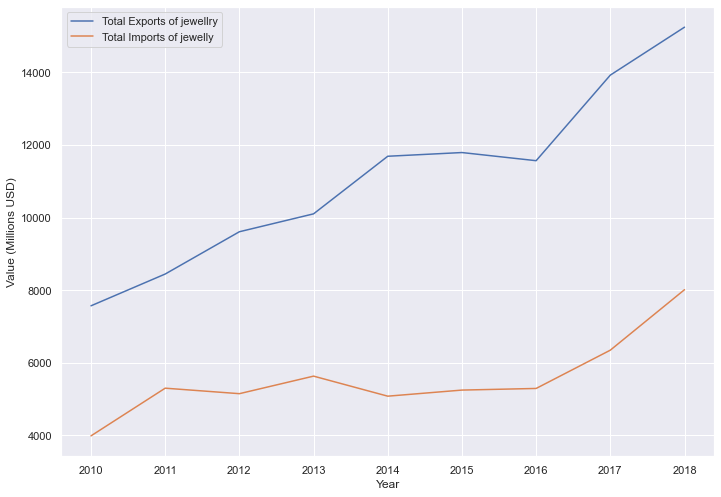

In [48]:
compare_jwl = compare[compare['HSCode'] == 71]
compare_jwl
plt.plot( compare_jwl['year'], compare_jwl.drop(['year', 'HSCode'], axis=1),)
leg = ['Total Exports of jewellry', 'Total Imports of jewelly']
plt.legend(leg)
plt.xlabel('Year')
plt.ylabel('Value (Millions USD)')

### Large industrial devices


Text(0, 0.5, 'Value (Millions USD)')

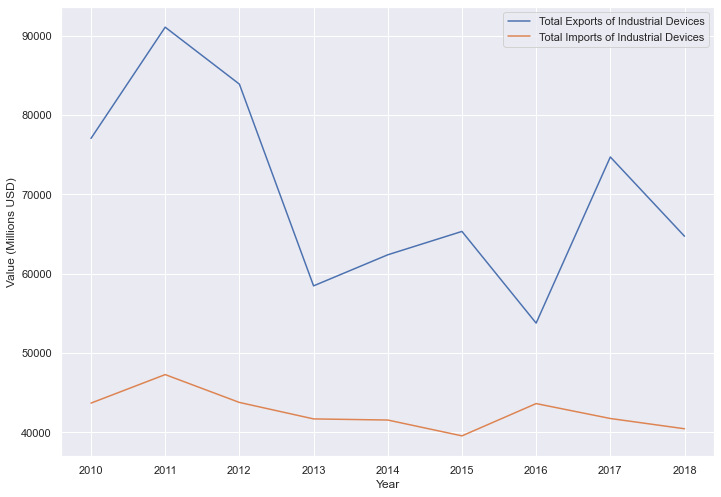

In [49]:
compare_ind = compare[compare['HSCode'] == 71]
compare_ind
plt.plot( compare_ind['year'], compare_ind.drop(['year', 'HSCode'], axis=1),)
leg = ['Total Exports of Industrial Devices', 'Total Imports of Industrial Devices']
plt.legend(leg)
plt.xlabel('Year')
plt.ylabel('Value (Millions USD)')

### Electrical Machinery and components

Text(0, 0.5, 'Value (Millions USD)')

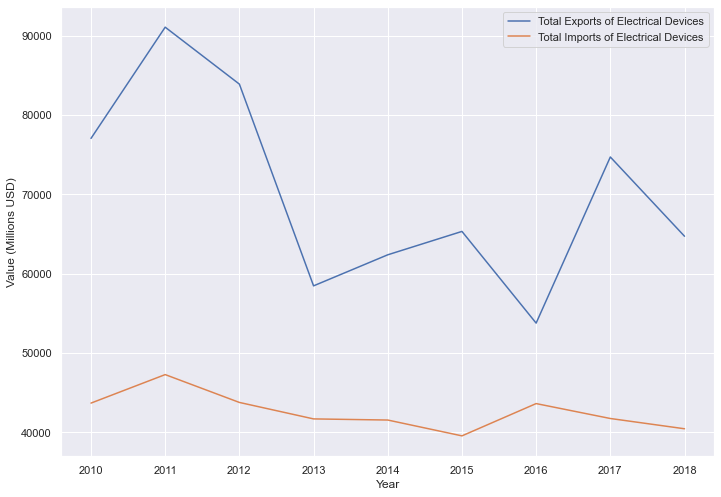

In [50]:
compare_elec = compare[compare['HSCode'] == 71]
compare_elec
plt.plot( compare_elec['year'], compare_elec.drop(['year', 'HSCode'], axis=1),)
leg = ['Total Exports of Electrical Devices', 'Total Imports of Electrical Devices']
plt.legend(leg)
plt.xlabel('Year')
plt.ylabel('Value (Millions USD)')